In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
data=np.load('test_line.npy')

# Funciones

In [3]:
#Funciones
# funcion del modelo
def f(x, a, b):
    return a + b*x

# Likelihood
def llh(theta,x,y,erry):
    #return -0.5*np.sum((y - f(x, *theta))**2/(sig**2))
    return -0.5*np.sum(np.log(2*np.pi*erry**2)+(y - f(x, *theta))**2/(erry**2))

def prior(a,b):
    return 1

def post(theta,x,y,erry):
    #lnprior=np.log(prior(theta))
    lnlike=llh(theta,x,y,erry)
    lnpost=lnlike#+lnprior
    return lnpost

In [4]:
pos_ini=[50,200]

pos=pos_ini+ 1e-4*np.random.randn(50,2)
nwalkers, ndim=pos.shape

sampler=emcee.EnsembleSampler(nwalkers,ndim,post,args=(data[0],data[1],data[2]))
sampler.run_mcmc(pos, 5000,progress=True);

100%|██████████| 5000/5000 [00:05<00:00, 908.79it/s]


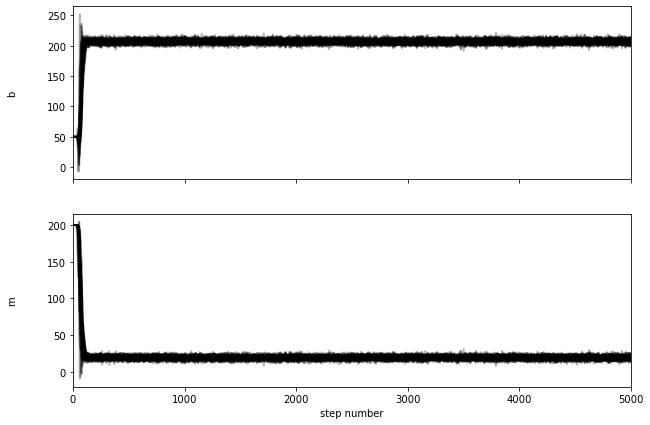

In [5]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["b", "m"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [6]:
flat_samples=sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(16300, 2)


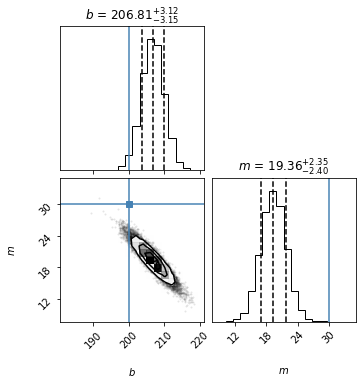

In [7]:
m_true , b_true= 30 , 200
figure=corner.corner(
    flat_samples,labels=[r"$b$", r"$m$", r"$\Gamma \, [\mathrm{parsec}]$"],
    quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12},truths=[b_true,m_true])

In [8]:
from IPython.display import display, Math
labels = ["b", "m",]
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>